# COGS109 Final Project
# Topic: White Wine Quality
# Team26: Zanyuan Yang, Zheran Li, Zihan Zhang

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
#load the wine data
df_white = pd.read_csv('whitewine.csv')
df_red = pd.read_csv('redwine.csv')

In [3]:
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
print(df_white.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## White wine

### Visualization
#### It is very complex to analyse all value by building a model. Therefore, we have to predict which values is most affected the quality of white wine.  In order to achieve it, we use the boxplot to determine which value is most affected the quality of white wine

#### By plotting the boxplot(Quality vs. Input variables), by looking the boxplot, we will choose which variables have influence on wine quality

Text(0.5, 1.0, 'fixed acidity')

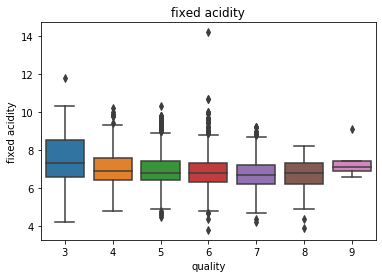

In [5]:
sns.boxplot(x='quality',y = 'fixed acidity', data= df_white)
plt.title("fixed acidity")

From above boxplot, we can see that quality don't change between 4 to 7

Text(0.5, 1.0, 'volatile acidity')

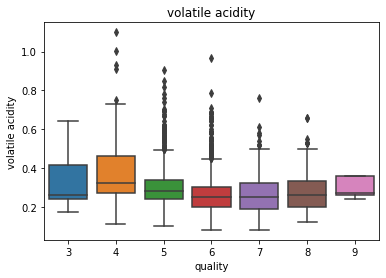

In [6]:
sns.boxplot(x='quality',y = 'volatile acidity', data= df_white)
plt.title("volatile acidity")

Text(0.5, 1.0, 'citric acid')

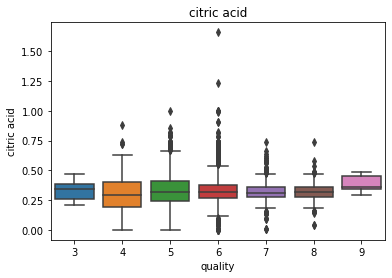

In [7]:
sns.boxplot(x='quality',y = 'citric acid', data= df_white)
plt.title("citric acid")

Text(0.5, 1.0, 'residual sugar')

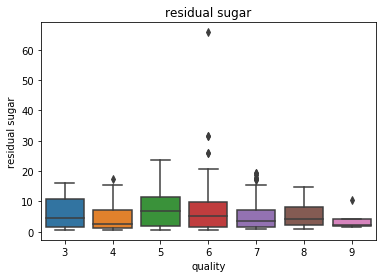

In [8]:
sns.boxplot(x='quality',y = 'residual sugar', data= df_white)
plt.title("residual sugar")

Text(0.5, 1.0, 'chlorides')

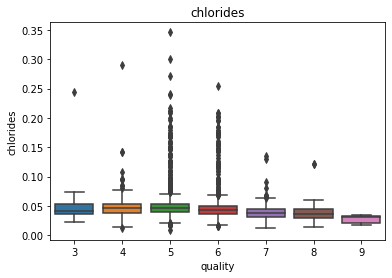

In [9]:
sns.boxplot(x='quality',y = 'chlorides', data= df_white)
plt.title("chlorides")

Text(0.5, 1.0, 'free sulfur dioxide')

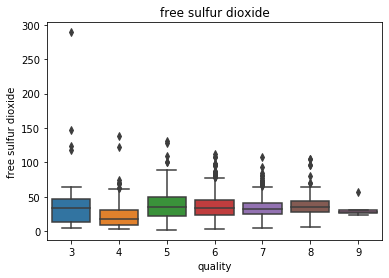

In [10]:
sns.boxplot(x='quality',y = 'free sulfur dioxide', data= df_white)
plt.title("free sulfur dioxide")

Text(0.5, 1.0, 'density')

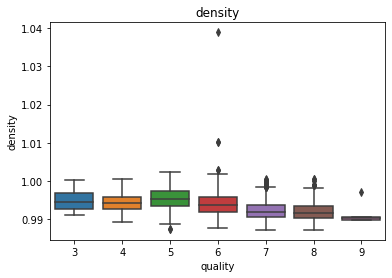

In [11]:
sns.boxplot(x='quality',y = 'density', data= df_white)
plt.title("density")

Text(0.5, 1.0, 'pH')

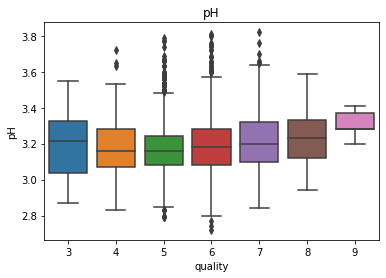

In [12]:
sns.boxplot(x='quality',y = 'pH', data= df_white)
plt.title("pH")

Text(0.5, 1.0, 'sulphates')

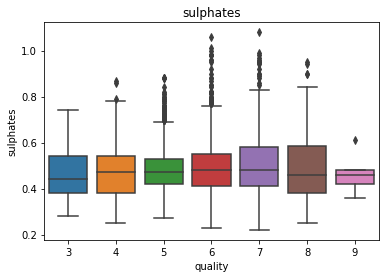

In [13]:
sns.boxplot(x='quality',y = 'sulphates', data= df_white)
plt.title("sulphates")

Text(0.5, 1.0, 'alcohol')

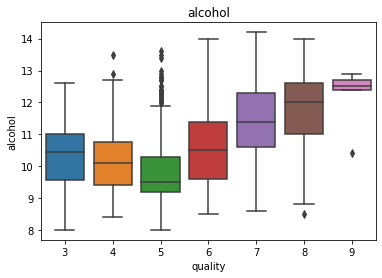

In [14]:
sns.boxplot(x='quality',y = 'alcohol', data= df_white)
plt.title("alcohol")

### From above all boxplot, we can come out to a predict conclusion, the value will affect the quality of white wine is:
- `alcohol`
- `density`
- `residual sugar`
- `volatile acidity`

## Linear Regression

In [15]:
#extract the variables
Y = df_white['quality'].values
X_alcohol = df_white['alcohol'].values
X_density = df_white['density'].values
X_residual_sugar = df_white['residual sugar'].values
X_volatile_acidity = df_white['volatile acidity'].values

### Alcohol's model

In [16]:
## Create A, the augmented data array
Y_train, Y_test, X1_train, X1_test = train_test_split(Y, X_alcohol,test_size=0.2)
ones = np.ones(len(X1_train))
squares = np.square(X1_train)
cubes = np.power(X1_train,3)

A_alcohol1 = np.vstack([ones,X1_train])
A_alcohol1 = A_alcohol1.T
A_alcohol2 = np.vstack([ones,X1_train,squares])
A_alcohol2 = A_alcohol2.T
A_alcohol3 = np.vstack([ones,X1_train,squares, cubes])
A_alcohol3 = A_alcohol3.T


w_alcohol1 = np.linalg.lstsq(A_alcohol1, Y_train, rcond=None)[0]
w_alcohol2 = np.linalg.lstsq(A_alcohol2, Y_train, rcond=None)[0]
w_alcohol3 = np.linalg.lstsq(A_alcohol3, Y_train, rcond=None)[0]
print("quality = ",round(w_alcohol1[0], 2) , "+", round(w_alcohol1[1], 2), "* alcohol")
print("quality = ",round(w_alcohol2[0], 2) , "+", round(w_alcohol2[1], 2), "* alcohol + ", round(w_alcohol2[2], 2), "* alcohol^2")
print("quality = ",round(w_alcohol3[0], 2) , "+", round(w_alcohol3[1], 2), "* alcohol + ", round(w_alcohol3[2], 2), "* alcohol^2 + ", round(w_alcohol3[3], 2), "* alcohol^3")

quality =  2.59 + 0.31 * alcohol
quality =  5.84 + -0.3 * alcohol +  0.03 * alcohol^2
quality =  41.61 + -10.28 * alcohol +  0.95 * alcohol^2 +  -0.03 * alcohol^3


In [17]:
lineinput = np.linspace(7,15,100)

ones = np.ones(len(lineinput))
squares = np.square(lineinput)
cubes = np.power(lineinput,3)

A_alcohol1 = np.vstack([ones, lineinput])
A_alcohol2 = np.vstack([ones, lineinput, squares])
A_alcohol3 = np.vstack([ones, lineinput, squares, cubes])

yplot1_alcohol = np.round_(np.matmul(A_alcohol1.T,w_alcohol1))
yplot2_alcohol = np.round_(np.matmul(A_alcohol2.T,w_alcohol2))
yplot3_alcohol = np.round_(np.matmul(A_alcohol3.T,w_alcohol3))

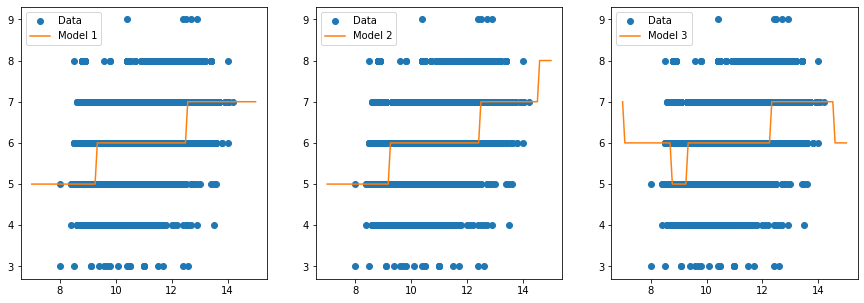

In [18]:
# Plot the data
# Plot the model
fix, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
ax[0].plot(X_alcohol,Y,'o',label="Data")
ax[0].plot(lineinput,yplot1_alcohol,label="Model 1")
ax[0].legend()

ax[1].plot(X_alcohol,Y,'o',label="Data")
ax[1].plot(lineinput,yplot2_alcohol,label="Model 2")
ax[1].legend()

ax[2].plot(X_alcohol,Y,'o',label="Data")
ax[2].plot(lineinput,yplot3_alcohol,label="Model 3")
ax[2].legend()
plt.show()

#### Alcohol's SSE

Model 1 SSE is:  787.0
Model 2 SSE is:  783.0
Model 3 SSE is:  783.0


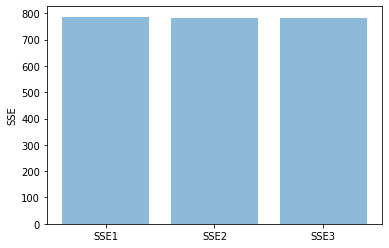

In [19]:
## Send the X values for plotting through the linear model
ones = np.ones(len(X1_test))
squares = np.square(X1_test)
cubes = np.power(X1_test,3)

A_alcohol1 = np.vstack([ones, X1_test])
A_alcohol2 = np.vstack([ones, X1_test, squares])
A_alcohol3 = np.vstack([ones, X1_test, squares, cubes])

y1_alcohol = np.round_(np.matmul(A_alcohol1.T,w_alcohol1))
y2_alcohol = np.round_(np.matmul(A_alcohol2.T,w_alcohol2))
y3_alcohol = np.round_(np.matmul(A_alcohol3.T,w_alcohol3))

SSE1 = sum(np.square(y1_alcohol - Y_test))
SSE2 = sum(np.square(y2_alcohol - Y_test))
SSE3 = sum(np.square(y3_alcohol - Y_test))
print("Model 1 SSE is: ", SSE1)
print("Model 2 SSE is: ", SSE2)
print("Model 3 SSE is: ", SSE3)
SSE = ('SSE1', 'SSE2', 'SSE3')
y_pos = np.arange(len(SSE))
SSE_value = [SSE1,SSE2,SSE3]

plt.bar(y_pos, SSE_value, align='center', alpha=0.5)
plt.xticks(y_pos,SSE)
plt.ylabel("SSE")
plt.show()

From the histogram above, Model 3 have the lower SSE. Therefore, the best model of Alcohol is 
`quality =  48.62 + -12.25 * alcohol +  1.13 * alcohol^2 +  -0.03 * alcohol^3`

### Density's model

In [20]:
## Create A, the augmented data array
Y2_train, Y2_test, X2_train, X2_test = train_test_split(Y, X_density,test_size=0.2)
ones = np.ones(len(X2_train))
squares = np.square(X2_train)
cubes = np.power(X2_train,3)

A_density1 = np.vstack([ones,X2_train])
A_density1 = A_density1.T
A_density2 = np.vstack([ones,X2_train,squares])
A_density2 = A_density2.T
A_density3 = np.vstack([ones,X2_train,squares, cubes])
A_density3 = A_density3.T


w_density1 = np.linalg.lstsq(A_density1, Y2_train, rcond=None)[0]
w_density2 = np.linalg.lstsq(A_density2, Y2_train, rcond=None)[0]
w_density3 = np.linalg.lstsq(A_density3, Y2_train, rcond=None)[0]
print("quality = ",round(w_density1[0], 2) , "+", round(w_density1[1], 2), "* density")
print("quality = ",round(w_density2[0], 2) , "+", round(w_density2[1], 2), "* density + ", round(w_density2[2], 2), "* density^2")
print("quality = ",round(w_density3[0], 2) , "+", round(w_density3[1], 2), "* density + ", round(w_density3[2], 2), "* density^2 + ", round(w_density3[3], 2), "* density^3")

quality =  94.0 + -88.65 * density
quality =  3517.77 + -6965.79 * density +  3453.4 * density^2
quality =  318822.35 + -945871.34 * density +  935233.07 * density^2 +  -308178.43 * density^3


In [21]:
## Create a smooth set of X values for plotting the model
lineinput = np.linspace(0.98,1.04,3)

## Send the X values for plotting through the linear model
ones = np.ones(len(lineinput))
squares = np.square(lineinput)
cubes = np.power(lineinput,3)

A_density1 = np.vstack([ones, lineinput])
A_density2 = np.vstack([ones, lineinput, squares])
A_density3 = np.vstack([ones, lineinput, squares, cubes])

yplot1_density = np.round_(np.matmul(A_density1.T,w_density1))
yplot2_density = np.round_(np.matmul(A_density2.T,w_density2))
yplot3_density = np.round_(np.matmul(A_density3.T,w_density3))

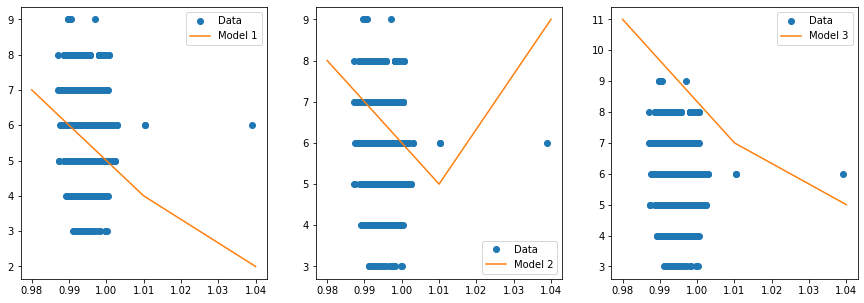

In [22]:
# Plot the data
# Plot the model
fix, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
ax[0].plot(X_density,Y,'o',label="Data")
ax[0].plot(lineinput,yplot1_density,label="Model 1")
ax[0].legend()

ax[1].plot(X_density,Y,'o',label="Data")
ax[1].plot(lineinput,yplot2_density,label="Model 2")
ax[1].legend()

ax[2].plot(X_density,Y,'o',label="Data")
ax[2].plot(lineinput,yplot3_density,label="Model 3")
ax[2].legend()
plt.show()

#### Density's SSE

Model 1 SSE is:  806.0
Model 2 SSE is:  810.0
Model 3 SSE is:  788.0


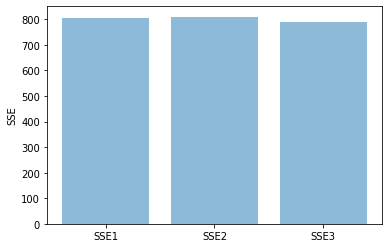

In [23]:
## Send the X values for plotting through the linear model
ones = np.ones(len(X2_test))
squares = np.square(X2_test)
cubes = np.power(X2_test,3)

A_density1 = np.vstack([ones, X2_test])
A_density2 = np.vstack([ones, X2_test, squares])
A_density3 = np.vstack([ones, X2_test, squares, cubes])

y1_density = np.round_(np.matmul(A_density1.T,w_density1))
y2_density = np.round_(np.matmul(A_density2.T,w_density2))
y3_density = np.round_(np.matmul(A_density3.T,w_density3))
SSE1 = sum(np.square(y1_density - Y2_test))
SSE2 = sum(np.square(y2_density - Y2_test))
SSE3 = sum(np.square(y3_density - Y2_test))
print("Model 1 SSE is: ", SSE1)
print("Model 2 SSE is: ", SSE2)
print("Model 3 SSE is: ", SSE3)
SSE = ('SSE1', 'SSE2', 'SSE3')
y_pos = np.arange(len(SSE))
SSE_value = [SSE1,SSE2,SSE3]

plt.bar(y_pos, SSE_value, align='center', alpha=0.5)
plt.xticks(y_pos,SSE)
plt.ylabel("SSE")
plt.show()

From the histogram above, Model 3 have the lower SSE. Therefore, the best model of Density is
`quality =  303481.16 + -900194.06 * density +  889910.18 * density^2 +  -293191.67 * density^3`

### Residual sugar's model

In [24]:
## Create A, the augmented data array
Y3_train, Y3_test, X3_train, X3_test = train_test_split(Y, X_residual_sugar,test_size=0.2)
ones = np.ones(len(X3_train))
squares = np.square(X3_train)
cubes = np.power(X3_train,3)

A_residual_sugar1 = np.vstack([ones,X3_train])
A_residual_sugar1 = A_residual_sugar1.T
A_residual_sugar2 = np.vstack([ones,X3_train,squares])
A_residual_sugar2 = A_residual_sugar2.T
A_residual_sugar3 = np.vstack([ones,X3_train,squares, cubes])
A_residual_sugar3 = A_residual_sugar3.T


w_residual_sugar1 = np.linalg.lstsq(A_residual_sugar1, Y3_train, rcond=None)[0]
w_residual_sugar2 = np.linalg.lstsq(A_residual_sugar2, Y3_train, rcond=None)[0]
w_residual_sugar3 = np.linalg.lstsq(A_residual_sugar3, Y3_train, rcond=None)[0]
print("quality = ",round(w_residual_sugar1[0], 2) , "+", round(w_residual_sugar1[1], 2), "* residual_sugar")
print("quality = ",round(w_residual_sugar2[0], 2) , "+", round(w_residual_sugar2[1], 2), "* residual_sugar + ", round(w_residual_sugar2[2], 2), "* residual_sugar^2")
print("quality = ",round(w_residual_sugar3[0], 2) , "+", round(w_residual_sugar3[1], 2), "* residual_sugar + ", round(w_residual_sugar3[2], 2), "* residual_sugar^2 + ", round(w_residual_sugar3[3], 2), "* residual_sugar^3")

quality =  5.98 + -0.02 * residual_sugar
quality =  5.99 + -0.02 * residual_sugar +  0.0 * residual_sugar^2
quality =  5.92 + 0.01 * residual_sugar +  -0.0 * residual_sugar^2 +  0.0 * residual_sugar^3


In [25]:
## Create a smooth set of X values for plotting the model
lineinput = np.linspace(0,70,10)

## Send the X values for plotting through the linear model
ones = np.ones(len(lineinput))
squares = np.square(lineinput)
cubes = np.power(lineinput,3)

A_residual_sugar1 = np.vstack([ones, lineinput])
A_residual_sugar2 = np.vstack([ones, lineinput, squares])
A_residual_sugar3 = np.vstack([ones, lineinput, squares, cubes])

yplot1_residual_sugar = np.round_(np.matmul(A_residual_sugar1.T,w_residual_sugar1))
yplot2_residual_sugar = np.round_(np.matmul(A_residual_sugar2.T,w_residual_sugar2))
yplot3_residual_sugar = np.round_(np.matmul(A_residual_sugar3.T,w_residual_sugar3))

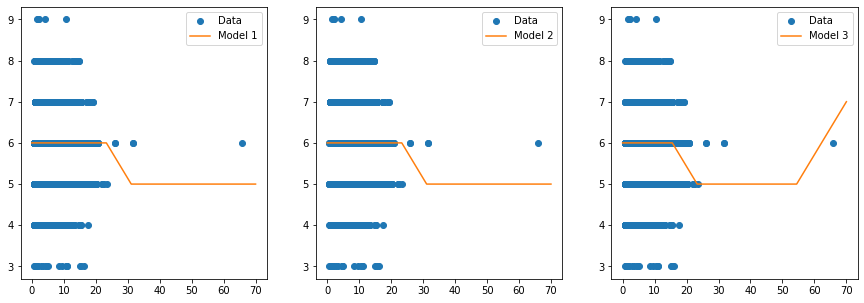

In [26]:
# Plot the data
# Plot the model
fix, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
ax[0].plot(X_residual_sugar,Y,'o',label="Data")
ax[0].plot(lineinput,yplot1_residual_sugar,label="Model 1")
ax[0].legend()

ax[1].plot(X_residual_sugar,Y,'o',label="Data")
ax[1].plot(lineinput,yplot2_residual_sugar,label="Model 2")
ax[1].legend()

ax[2].plot(X_residual_sugar,Y,'o',label="Data")
ax[2].plot(lineinput,yplot3_residual_sugar,label="Model 3")
ax[2].legend()
plt.show()

#### Residual sugar's SSE

Model 1 SSE is:  804.0
Model 2 SSE is:  804.0
Model 3 SSE is:  805.0


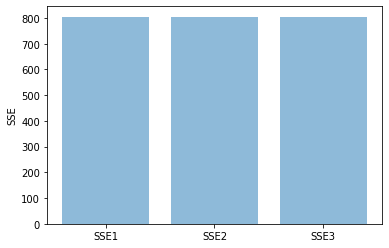

In [27]:
## Send the X values for plotting through the linear model
ones = np.ones(len(X3_test))
squares = np.square(X3_test)
cubes = np.power(X3_test,3)

A_residual_sugar1 = np.vstack([ones, X3_test])
A_residual_sugar2 = np.vstack([ones, X3_test, squares])
A_residual_sugar3 = np.vstack([ones, X3_test, squares, cubes])

y1_residual_sugar = np.round_(np.matmul(A_residual_sugar1.T,w_residual_sugar1))
y2_residual_sugar = np.round_(np.matmul(A_residual_sugar2.T,w_residual_sugar2))
y3_residual_sugar = np.round_(np.matmul(A_residual_sugar3.T,w_residual_sugar3))
SSE1 = sum(np.square(y1_residual_sugar - Y3_test))
SSE2 = sum(np.square(y2_residual_sugar - Y3_test))
SSE3 = sum(np.square(y3_residual_sugar - Y3_test))
print("Model 1 SSE is: ", SSE1)
print("Model 2 SSE is: ", SSE2)
print("Model 3 SSE is: ", SSE3)
SSE = ('SSE1', 'SSE2', 'SSE3')
y_pos = np.arange(len(SSE))
SSE_value = [SSE1,SSE2,SSE3]

plt.bar(y_pos, SSE_value, align='center', alpha=0.5)
plt.xticks(y_pos,SSE)
plt.ylabel("SSE")
plt.show()

From the histogram above, Model 3 have the lower SSE. Therefore, the best model of Residual sugar is

`quality =  5.9 + 0.02 * residual_sugar +  -0.0 * residual_sugar^2 +  0.0 * residual_sugar^3`

### Volatile acidity’s model

In [28]:
## Create A, the augmented data array
Y4_train, Y4_test, X4_train, X4_test = train_test_split(Y, X_volatile_acidity,test_size=0.2)
ones = np.ones(len(X4_train))
squares = np.square(X4_train)
cubes = np.power(X4_train,3)

A_volatile_acidity1 = np.vstack([ones,X4_train])
A_volatile_acidity1 = A_volatile_acidity1.T
A_volatile_acidity2 = np.vstack([ones,X4_train,squares])
A_volatile_acidity2 = A_volatile_acidity2.T
A_volatile_acidity3 = np.vstack([ones,X4_train,squares, cubes])
A_volatile_acidity3 = A_volatile_acidity3.T


w_volatile_acidity1 = np.linalg.lstsq(A_volatile_acidity1, Y4_train, rcond=None)[0]
w_volatile_acidity2 = np.linalg.lstsq(A_volatile_acidity2, Y4_train, rcond=None)[0]
w_volatile_acidity3 = np.linalg.lstsq(A_volatile_acidity3, Y4_train, rcond=None)[0]

print("quality = ",round(w_volatile_acidity3[0], 2) , "+", round(w_volatile_acidity3[1], 2), "* volatile_acidity + ", round(w_volatile_acidity3[2], 2), "* volatile_acidity^2 + ", round(w_volatile_acidity3[3], 2), "* volatile_acidity^3")

quality =  6.84 + -5.92 * volatile_acidity +  10.43 * volatile_acidity^2 +  -7.51 * volatile_acidity^3


In [29]:
## Create a smooth set of X values for plotting the model
lineinput = np.linspace(0,1.25,10)

ones = np.ones(len(lineinput))
squares = np.square(lineinput)
cubes = np.power(lineinput,3)

A_volatile_acidity1 = np.vstack([ones, lineinput])
A_volatile_acidity2 = np.vstack([ones, lineinput, squares])
A_volatile_acidity3 = np.vstack([ones, lineinput, squares, cubes])

yplot1_volatile_acidity = np.round_(np.matmul(A_volatile_acidity1.T,w_volatile_acidity1))
yplot2_volatile_acidity = np.round_(np.matmul(A_volatile_acidity2.T,w_volatile_acidity2))
yplot3_volatile_acidity = np.round_(np.matmul(A_volatile_acidity3.T,w_volatile_acidity3))

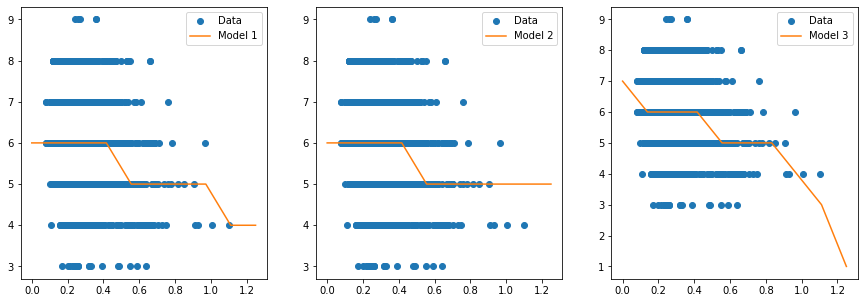

In [30]:
# Plot the data
# Plot the model
fix, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
ax[0].plot(X_volatile_acidity,Y,'o',label="Data")
ax[0].plot(lineinput,yplot1_volatile_acidity,label="Model 1")
ax[0].legend()

ax[1].plot(X_volatile_acidity,Y,'o',label="Data")
ax[1].plot(lineinput,yplot2_volatile_acidity,label="Model 2")
ax[1].legend()

ax[2].plot(X_volatile_acidity,Y,'o',label="Data")
ax[2].plot(lineinput,yplot3_volatile_acidity,label="Model 3")
ax[2].legend()
plt.show()

#### Volatile acidity’s SSE

Model 1 SSE is:  789.0
Model 2 SSE is:  790.0
Model 3 SSE is:  782.0


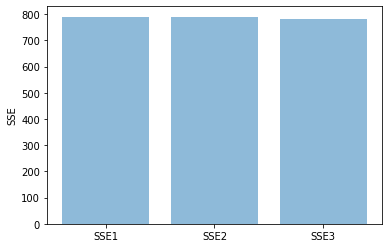

In [31]:
## Send the X values for plotting through the linear model
ones = np.ones(len(X4_test))
squares = np.square(X4_test)
cubes = np.power(X4_test,3)

A_volatile_acidity1 = np.vstack([ones, X4_test])
A_volatile_acidity2 = np.vstack([ones, X4_test, squares])
A_volatile_acidity3 = np.vstack([ones, X4_test, squares, cubes])

y1_volatile_acidity = np.round_(np.matmul(A_volatile_acidity1.T,w_volatile_acidity1))
y2_volatile_acidity = np.round_(np.matmul(A_volatile_acidity2.T,w_volatile_acidity2))
y3_volatile_acidity = np.round_(np.matmul(A_volatile_acidity3.T,w_volatile_acidity3))

SSE1 = sum(np.square(y1_volatile_acidity - Y4_test))
SSE2 = sum(np.square(y2_volatile_acidity - Y4_test))
SSE3 = sum(np.square(y3_volatile_acidity - Y4_test))
print("Model 1 SSE is: ", SSE1)
print("Model 2 SSE is: ", SSE2)
print("Model 3 SSE is: ", SSE3)
SSE = ('SSE1', 'SSE2', 'SSE3')
y_pos = np.arange(len(SSE))
SSE_value = [SSE1,SSE2,SSE3]

plt.bar(y_pos, SSE_value, align='center', alpha=0.5)
plt.xticks(y_pos,SSE)
plt.ylabel("SSE")
plt.show()

From the histogram above, Model 3 have the lower SSE. Therefore, the best model of Volatile acidity is
`quality =  6.81 + -5.7 * volatile_acidity +  9.7 * volatile_acidity^2 +  -6.65 * volatile_acidity^3`

# Conclusion 

From the boxplots above, we can get that alcohol, density, residual sugar and volatile acidity have influence on white wine quality. By calculate their own SSE, we come out with the best model for this 4 variables.
- Alcohol best model is: `quality =  48.62 + -12.25 * alcohol +  1.13 * alcohol^2 +  -0.03 * alcohol^3`
- Density best model is: `quality =  303481.16 + -900194.06 * density +  889910.18 * density^2 +  -293191.67 * density^3`
- Residual sugar best model is: `quality =  5.9 + 0.02 * residual_sugar +  -0.0 * residual_sugar^2 +  0.0 * residual_sugar^3`
- Volatile acidity best model is: `quality =  6.81 + -5.7 * volatile_acidity +  9.7 * volatile_acidity^2 +  -6.65 * volatile_acidity^3`